In [1]:
#决策树 非线性二分类
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

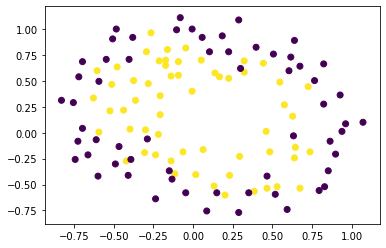

In [2]:
#载入数据
data = np.genfromtxt('LR-testSet2.txt',delimiter = ',')
x_data = data[:,:-1]
y_data = data[:,-1]
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x_data, y_data)
#max_depth 树的深度
#min_samples_split 内部节点再划分所需最小样本数
model = tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
import graphviz

dot_data = tree.export_graphviz(model,
                                            out_file = None,
                                            feature_names = ['x','y'],
                                            class_names = ['label1','label0'],
                                            filled = True,
                                            rounded = True,
                                            special_characters = True)
graph = graphviz.Source(dot_data)



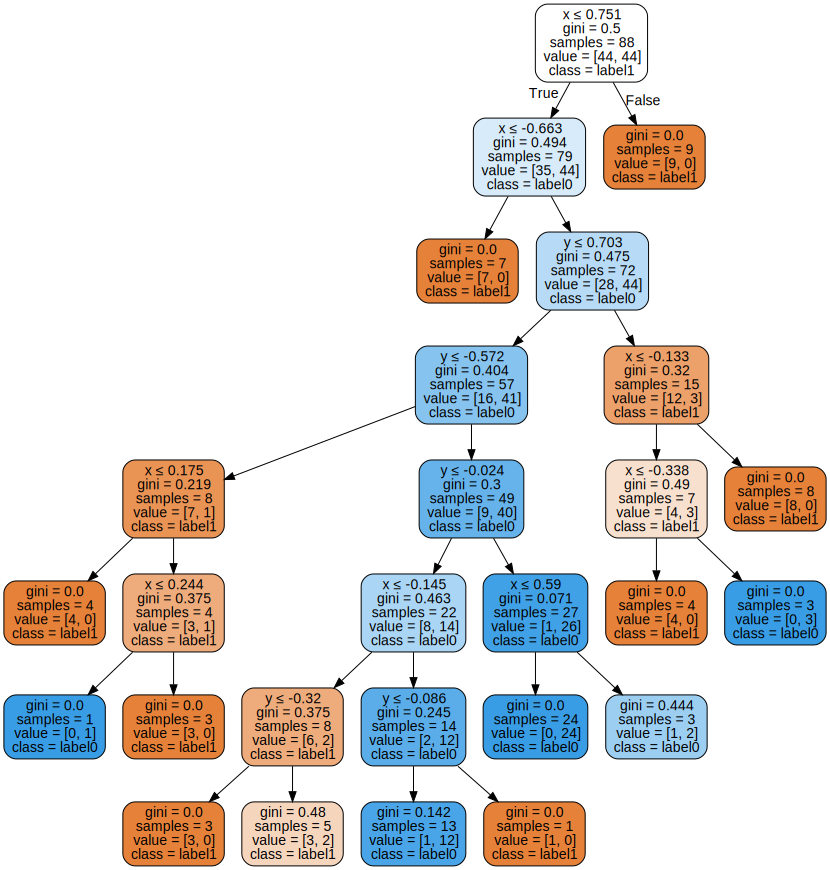

In [17]:
graph

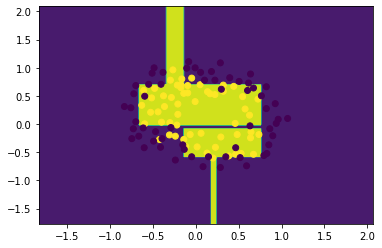

In [18]:
x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
#生成网格矩阵
xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min,y_max,0.02))
# print(xx.shape)
# print(xx.ravel().shape)

z =model.predict(np.c_[xx.ravel(), yy.ravel()])
# print(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0], x_data[:,1], c= y_data)  
plt.show()

In [19]:
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        44
         1.0       0.95      0.95      0.95        44

    accuracy                           0.95        88
   macro avg       0.95      0.95      0.95        88
weighted avg       0.95      0.95      0.95        88



In [20]:
predictions_test= model.predict(x_test)
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        16
         1.0       0.75      0.86      0.80        14

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

